# Kinematics of waterbomb folding and derived characteristics

In [7]:
%matplotlib widget

In [8]:
from bmcs_shell.folding.wb_cell_5p import WBElem5Param, WBElemSymb5ParamXL

In [9]:
import numpy as np

In [10]:
data = dict(gamma=0.7, x_ur=1000, a=1000, b=1800, c=1000, show_wireframe=True)

In [11]:
wb = WBElem5Param(**data)

In [12]:
wb.interact()

<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (-1/2*(B + sqrt(-4*A*C + B**2))/A)
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (sqrt((-a**2 - 2*a*x_ul*sin(gamma) - x_ul**2 + (a**2 + b**2)*cos(gamma)**2)/cos(gamma)**2))
<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/2*(B + sqrt(-4*A*C + B**2))/A)


## Waterbomb - 5 param folding

In [7]:
import sympy as sp
sp.init_printing()
import numpy as np

## Upper right corner node

Control parameters $a, b, c$ and angle $\alpha$

In [8]:
a, b, c = sp.symbols('a, b, c', positive=True)
alpha = sp.symbols('alpha', positive=True)

Position variables to be determined for the above control parameters

In [9]:
x_ur, y_ur, z_ur = sp.symbols(r'x^{\urcorner}, y^{\urcorner}, z^{\urcorner}', positive=True)

Node $V^\dashv$ rotates in the $xz$ plane. The control angle $\alpha = \pi/2$ for a flat state, i.e. $z^\dashv(\alpha=\pi/2) = 0$
\begin{align}
 V^\dashv = [c \sin(\alpha), 0, c \cos(\alpha)]
\end{align}

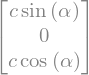

In [82]:
V_r_l = sp.Matrix([c * sp.sin(alpha), 0, c * sp.cos(alpha)])
V_r_l

Positions of $U^\urcorner_0$ and $V^\dashv_0$ 

In [89]:
U_ur_0 = sp.Matrix([a, b, 0])
V_r_0 = sp.Matrix([c, 0, 0])

Express the lengths $|OU^{\urcorner}|$ and $|U^{\urcorner}V^\dashv|$ in initial state

In [88]:
UV_r_0 = V_r_0 - U_ur_0
L2_U_ur_0 = (U_ur_0.T * U_ur_0)[0]
L2_UV_r_0 = (UV_r_0.T * UV_r_0)[0]

And in a general state of folding

In [91]:
U_ur_1 = sp.Matrix([x_ur, y_ur, z_ur])
UV_r_1 = U_ur_1 - V_r_l
L2_U_ur_1 = (U_ur_1.T * U_ur_1)[0]
L2_UV_r_1 = (UV_r_1.T * UV_r_1)[0]

Use the two quadratic equations to find $y^{\urcorner}$ and $z^\urcorner$ 

In [92]:
Eq_L2_U_ur = sp.simplify(sp.Eq(L2_U_ur_1-L2_U_ur_0,0))
y_ur_sol = sp.solve(Eq_L2_U_ur, y_ur)[0]
Eq_L2_UV_r = sp.simplify(sp.Eq(L2_UV_r_1-L2_UV_r_0,0))
Eq_L2_UV_r_z_ur = Eq_L2_UV_r.subs(y_ur, y_ur_sol)
z_ur_sol = sp.solve(Eq_L2_UV_r_z_ur, z_ur)[0]
U_ur = sp.Matrix([x_ur, y_ur_sol.subs(z_ur, z_ur_sol), z_ur_sol])

The resulting position of $U^\urcorner$ reads

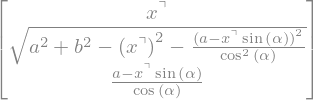

In [86]:
U_ur

Check the obtained coordinates for $\lim_{\alpha \rightarrow 0} U^\urcorner$ for $x^\urcorner = a$

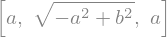

In [93]:
[sp.limit( U_ur.subs(x_ur,a)[idx], alpha, 0) for idx in [0,1,2]]

In a symmetric case, the other corner points can be simply mirrored 
with respect to the symmetry planes $xz$ and $xy$.

## Upper left corner in non-symmetric case
Considering the upper left corner, we can reuse the solution of the upper right corner by
substituting $U^{\urcorner} = - U^\ulcorner$
and alternating the sign of the $x$ coordinate. 

In [94]:
x_ul = sp.symbols(r'x^{\ulcorner}', negative=True)

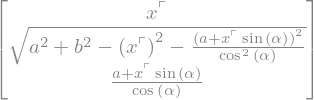

In [95]:
U_ul = U_ur.subs(x_ur, -x_ul)
U_ul[0] *= -1
U_ul

Check the limits

In [96]:
[sp.limit( U_ul.subs(x_ul,-a)[idx], alpha, sp.pi/2) for idx in [0,1,2]]

Define a vector $U^{\ulcorner\urcorner}$ as

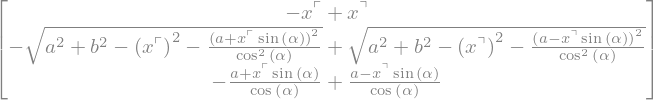

In [97]:
UU_u_1 = U_ur - U_ul
UU_u_1

Verify that by substituting $u^\urcorner = a$ and $u^\ulcorner = -1$ the symmetric case is recovered

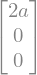

In [98]:
UU_u_1.subs({x_ur:a, x_ul:-a})

Considering again the non-symmetric configuration let us calculate the squaer of the vector length $| U^{\ulcorner\urcorner} |^2$

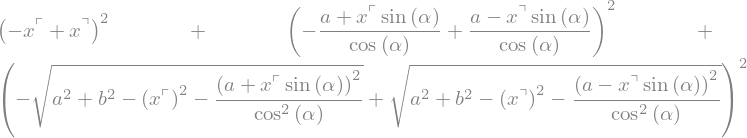

In [99]:
L2_UU_u_1 = (UU_u_1.T * UU_u_1)[0]
L2_UU_u_1

In [100]:
eta = sp.symbols('eta')

To control the twist of the non-symmetric fold mode of the waterbomb base, let us link $x^\ulcorner$ with 
$x^\urcorner$ by setting
\begin{align}
 x^\ulcorner = - \eta \, x^\urcorner
\end{align}

In [101]:
x_ul_ = - eta * x_ur

and substitute for $x^\ulcorner$ in $|U^{\ulcorner\urcorner}|^2$ to obtain

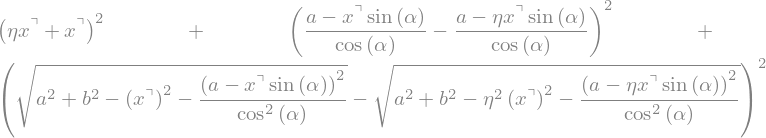

In [102]:
L2_UU_u_1_eta = L2_UU_u_1.subs(x_ul,x_ul_)
L2_UU_u_1_eta

Finally, require that the length $|U^{\ulcorner\urcorner}| = 2a$ is equal to the original length
at any state of folding

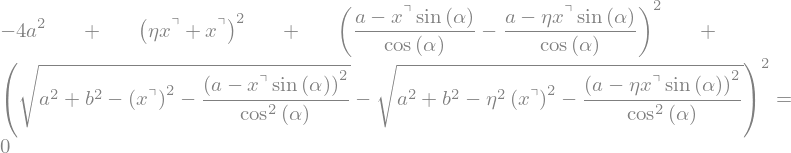

In [103]:
Eq_L2_UU_u_1 = sp.Eq(L2_UU_u_1_eta-(2*a)**2, 0)
Eq_L2_UU_u_1

The solver 

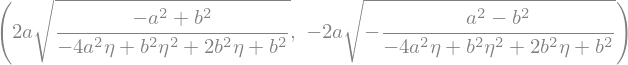

In [104]:
x_ur_sol_1, x_ur_sol_2 = sp.solve(Eq_L2_UU_u_1.subs(alpha,0), x_ur)
x_ur_sol_1, x_ur_sol_2

$\eta = 1$ recovers the symmetric case

In [105]:
sp.simplify(x_ur_sol_1.subs(eta,1))

# Upper left corner 

In [ ]:
z_ur_ = z_ur_sol
y_ur_ = y_ur_sol.subs(z_ur, z_ur_sol)
z_ur_, y_ur_

In [8]:
U_pp_a = U1_a.subs({u_2: u_2_, u_3: u_3_})
U_mm_a = sp.Matrix([-U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
U_mp_a = sp.Matrix([-U_pp_a[0], U_pp_a[1], U_pp_a[2]])
U_pm_a = sp.Matrix([U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
W_p_a = W1_a.subs({u_2: u_2_, u_3: u_3_})
W_m_a = sp.Matrix([-W_p_a[0], W_p_a[1], W_p_a[2]])

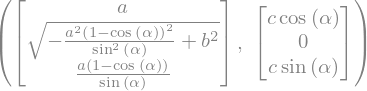

In [9]:
U_pp_a, W_p_a

## Compatible rotation of a cell around $x$ axis

In [12]:
V_UW = U_pp_a - W_p_a
L_UW = sp.sqrt(V_UW[1] ** 2 + V_UW[2] ** 2)
theta_sol = sp.simplify(2 * sp.asin( V_UW[2] / L_UW))

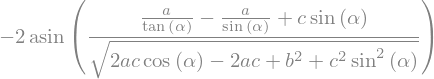

In [13]:
theta_sol

## Rotation of a cell  of a shifted cell

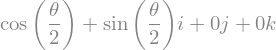

In [12]:
from sympy.algebras.quaternion import Quaternion
theta = sp.Symbol(r'theta')
q_theta = Quaternion.from_axis_angle([1, 0, 0], theta)
q_theta

In [100]:
d_1, d_2, d_3 = sp.symbols('d_1, d_2, d_3')
D_a = sp.Matrix([d_1, d_2, d_3])

In [101]:
UD_pp_a = U_pp_a + D_a
WD_p_a = W_p_a + D_a

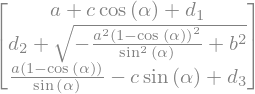

In [102]:
UD_pp_a - W_m_a

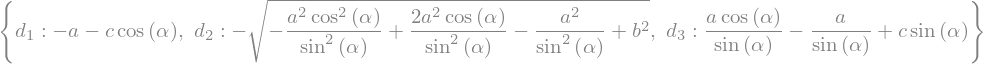

In [103]:
d_subs = sp.solve(UD_pp_a - W_m_a, [d_1, d_2, d_3])
d_subs

## Rotate by $\theta$

Define the center of rotation

In [104]:
UD_pp_a_ = UD_pp_a.subs(d_subs)

Rostated point

In [105]:
WD_p_a_ = WD_p_a.subs(d_subs)

Pull back the point so that the center of rotation is at origin

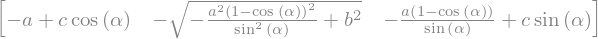

In [106]:
WD_p_a_pb = WD_p_a_ - UD_pp_a_
WD_p_a_pb.T

Rotate the point around the quaternion

In [71]:
WD_p_a_rot = q_theta.rotate_point(WD_p_a_pb.T, q_theta)

Push forward to the center of rotation

In [72]:
WD_p_a_pf = sp.Matrix(WD_p_a_rot) + UD_pp_a_
WD_p_a_theta = WD_p_a_pf.subs(theta, -theta_sol)

Rotate also the midpoint

In [73]:
DD_a_pb = D_a.subs(d_subs) - UD_pp_a_
DD_a_rot = q_theta.rotate_point(DD_a_pb.T, q_theta)
DD_a_pf = sp.simplify(sp.Matrix(DD_a_rot) + UD_pp_a_)
DD_a_theta = DD_a_pf.subs(theta, -theta_sol)

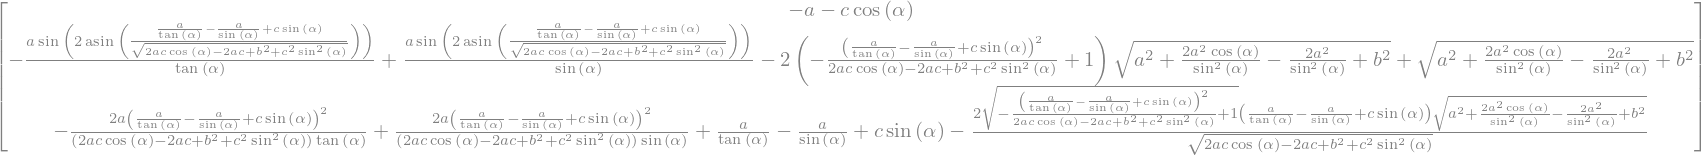

In [74]:
DD_a_theta

In [75]:
get_U_mm_a = sp.lambdify((alpha, a, b, c), U_mm_a )
get_WD_p_a_theta = sp.lambdify((alpha, a, b, c), WD_p_a_theta)

In [76]:
get_U_mm_a(0.2, 3, 10, 1)

array([[-3.        ],
       [-9.9954688 ],
       [ 0.30100402]])

In [77]:
get_WD_p_a_theta(0.2, 3, 10, 1)

array([[-3.        ],
       [-9.9954688 ],
       [ 0.30100402]])

In [78]:
sp.simplify((WD_p_a_theta - U_mm_a)[0])

## Cross sectional height

In [31]:
H = W_p_a[2]
H

In [32]:
V_WD = (WD_p_a_theta - DD_a_theta)
Vzy_WD = sp.Matrix([V_WD[1], V_WD[2]])

In [33]:
L_WD = Vzy_WD.T * Vzy_WD

In [34]:
get_L_WD = sp.lambdify((alpha, a, b, c), L_WD, 'numpy')

In [35]:
np.sqrt(get_L_WD(np.pi/2,2,3,5))

array([[5.]])

## Symmetry axis of the cylinder

In [39]:
D0_a = sp.Matrix([0,0,0])

In [40]:
W_m_a[2]

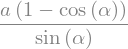

In [41]:
U_mm_a[2]

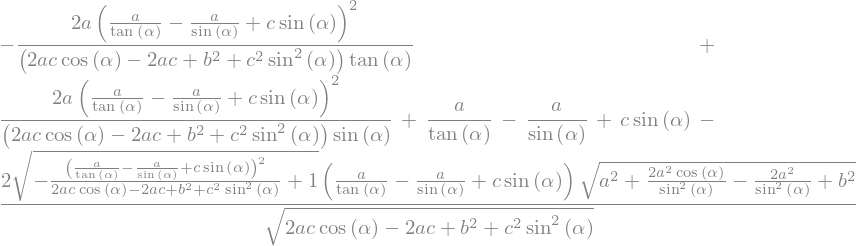

In [42]:
DD_a_theta[2]

Find the point at which the line connection between
\begin{align}
 U_{mm} + \rho (U_{mm} - D)
\end{align}
intersects the vertical axis

In [43]:
rho = (U_mm_a[2] - DD_a_theta[2]) / (U_mm_a[1] - DD_a_theta[1]) * U_mm_a[1]
R_0 = U_mm_a[2] - rho

In [44]:
get_U_mm_a = sp.lambdify((alpha, a, b, c), U_mm_a, 'numpy')
get_DD_a_theta = sp.lambdify((alpha, a, b, c), DD_a_theta, 'numpy')
get_rho = sp.lambdify((alpha, a, b, c), rho, 'numpy')
get_R_0 = sp.lambdify((alpha, a, b, c), R_0, 'numpy')

In [45]:
data = dict(alpha=1, a=1, b=1, c=1)
get_U_mm_a(**data)

array([[-1.        ],
       [-0.83758796],
       [ 0.54630249]])

In [46]:
get_DD_a_theta(**data)

array([[-1.54030231],
       [-0.31003043],
       [-0.10925565]])

In [47]:
get_rho(**data)

In [48]:
get_R_0(**data)

In [49]:
phi_0 = sp.asin( DD_a_theta[1] / R_0 )

In [50]:
get_phi_0 = sp.lambdify((alpha, a, b, c), phi_0, 'numpy')

In [51]:
get_phi_0(**data)